In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
types = {
    'HasCrCard':bool,
    'IsActiveMember':bool
}
train = pd.read_csv('data/train.csv', index_col='id', dtype=types)
test = pd.read_csv('data/test.csv', index_col='id', dtype=types)

In [3]:
train.shape, test.shape

((165034, 13), (110023, 12))

# Comparaison de la distribution du train et du test

In [4]:
# Je flag les dataset train et test pour ensuite les concat ensembles pour analyser l'ensemble complet des données qualitatives
train.insert(0,'origin','train')
test.insert(0,'origin','test')

In [5]:
data = pd.concat([train,test], axis=0)

In [6]:
# drop les columns qui ne semple pas utile pour la problématique
data.drop(columns=['CustomerId','Surname'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275057 entries, 0 to 275056
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   origin           275057 non-null  object 
 1   CreditScore      275057 non-null  int64  
 2   Geography        275057 non-null  object 
 3   Gender           275057 non-null  object 
 4   Age              275057 non-null  float64
 5   Tenure           275057 non-null  int64  
 6   Balance          275057 non-null  float64
 7   NumOfProducts    275057 non-null  int64  
 8   HasCrCard        275057 non-null  bool   
 9   IsActiveMember   275057 non-null  bool   
 10  EstimatedSalary  275057 non-null  float64
 11  Exited           165034 non-null  float64
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 23.6+ MB


## Qualitatives

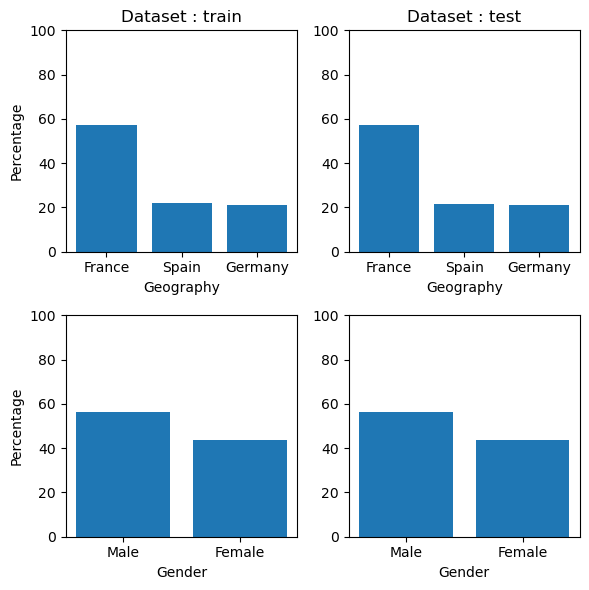

In [8]:
_ , axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

for x, origin in enumerate(data['origin'].unique()):
    axes[0,x].set_title(f'Dataset : {origin}') 
    for y, column in enumerate(data.select_dtypes('object').columns[1:]) :
        subset_data = data[data.origin == origin][column].value_counts(normalize=True)*100
        axes[y,x].bar(subset_data.index, subset_data)
        axes[y,x].set_xlabel(column)
        axes[y,x].set_ylim(0, 100)
        axes[y,0].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

## BOOLEAN

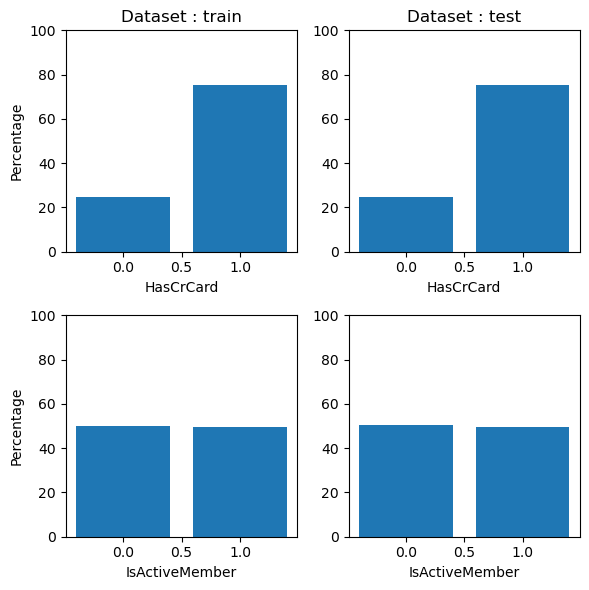

In [9]:
_ , axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

for x, origin in enumerate(data['origin'].unique()):
    axes[0,x].set_title(f'Dataset : {origin}') 
    for y, column in enumerate(data.select_dtypes('bool').columns) :
        subset_data = data[data.origin == origin][column].value_counts(normalize=True)*100
        axes[y,x].bar(subset_data.index, subset_data)
        axes[y,x].set_xlabel(column)
        axes[y,x].set_ylim(0, 100)
        axes[y,0].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

## Quantitatives

In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,165034.000000
mean,656.484939,38.124415,5.010867,55420.296450,1.554002,112470.952558,0.211599
std,80.188100,8.864927,2.806173,62805.933171,0.546178,50286.608747,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,74580.800000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,117848.090000,0.000000
75%,710.000000,42.000000,7.000000,120037.960000,2.000000,154871.130000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


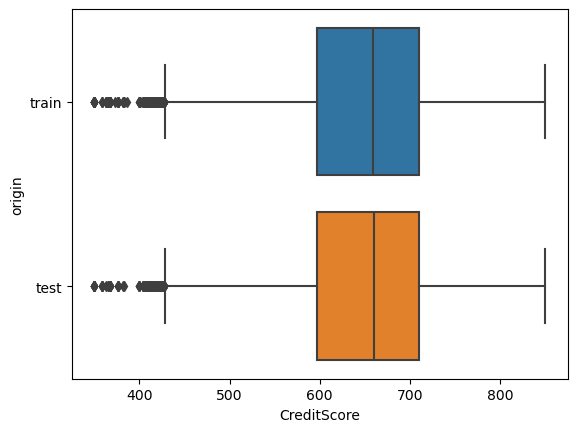

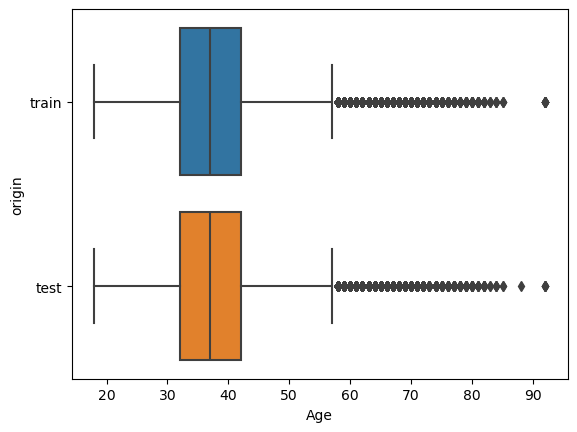

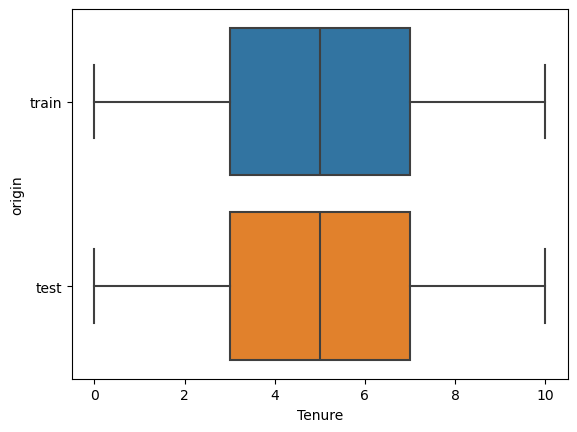

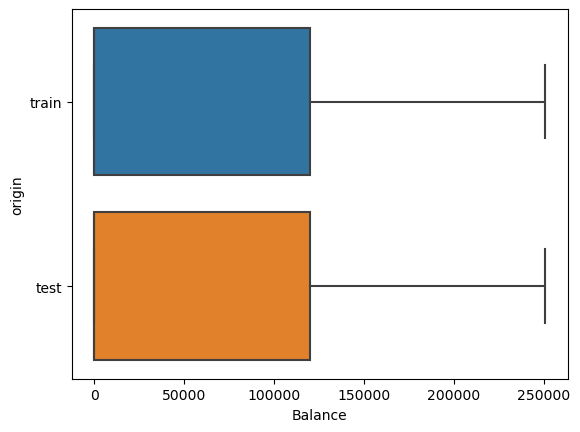

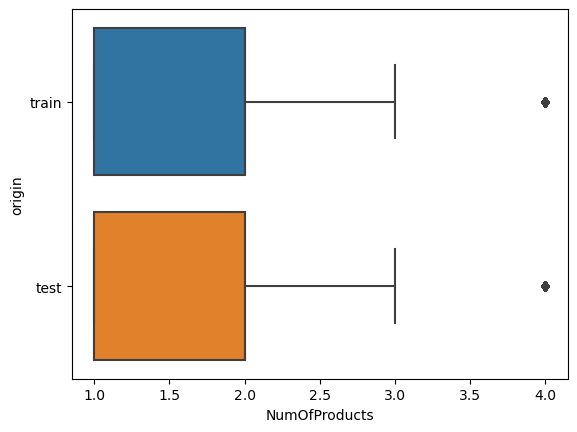

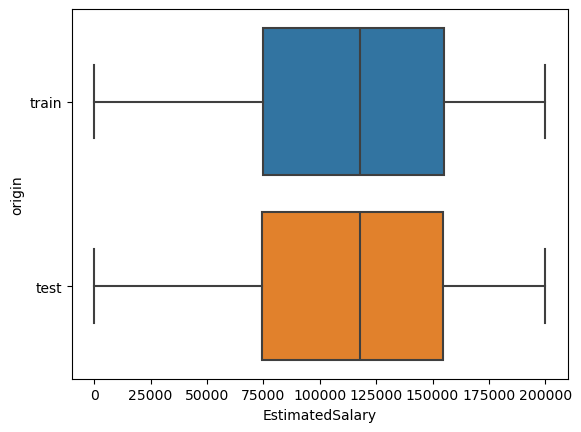

In [11]:
for column in data.select_dtypes('number').columns[:-1] :
    sns.boxplot(data, x=column, y='origin')
    plt.show()

# Analyse du churn en fonction des features

In [12]:
train.drop(columns=['origin','CustomerId','Surname'], inplace=True)

In [13]:
train.duplicated().sum()

123

In [14]:
train.drop_duplicates(inplace=True)

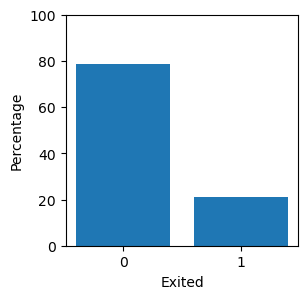

In [15]:
_ , axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
subset_data = train.Exited.value_counts(True)*100
axes.bar(subset_data.index, subset_data)
axes.set_xlabel('Exited')
axes.set_ylabel('Percentage')
axes.set_ylim(0, 100)
axes.set_xticks(subset_data.index)

plt.show()

**target unbalanced**

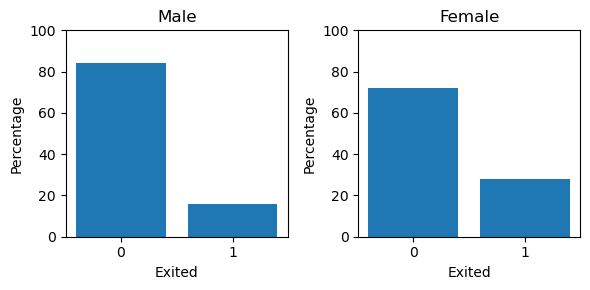

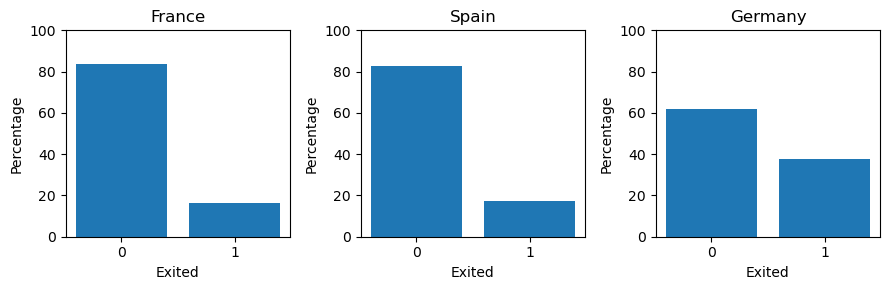

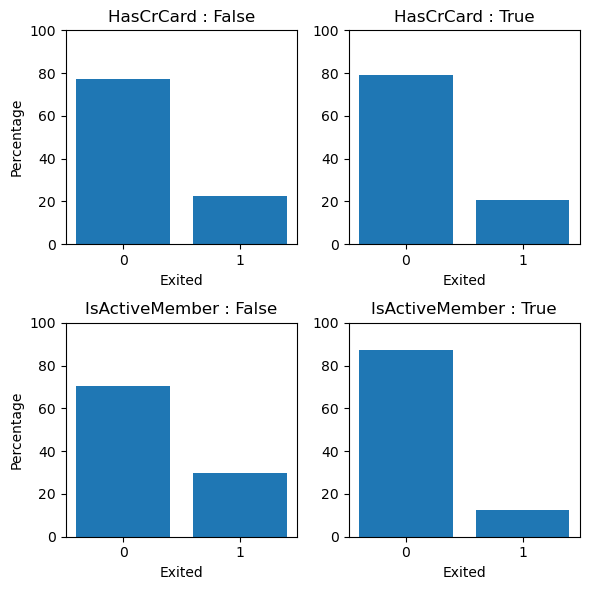

In [16]:
_ , axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

for x, gender in enumerate(train.Gender.unique()) :
    axes[x].set_title(f'{gender}') 
    subset_data = train[train.Gender == gender].Exited.value_counts(True)*100
    axes[x].bar(subset_data.index, subset_data)
    axes[x].set_xlabel('Exited')
    axes[x].set_ylabel('Percentage')
    axes[x].set_ylim(0, 100)
    axes[x].set_xticks(subset_data.index)
plt.tight_layout()
plt.show()

_ , axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
for x, geography in enumerate(train.Geography.unique()) :
    axes[x].set_title(f'{geography}') 
    subset_data = train[train.Geography == geography].Exited.value_counts(True)*100
    axes[x].bar(subset_data.index, subset_data)
    axes[x].set_xlabel('Exited')
    axes[x].set_ylabel('Percentage')
    axes[x].set_ylim(0, 100)
    axes[x].set_xticks(subset_data.index)
plt.tight_layout()
plt.show()

_ , axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

for y, column in enumerate(train.select_dtypes(bool).columns) :
    for x, BOOLEAN in enumerate([False,True]) :
        axes[y,x].set_title(f'{column} : {BOOLEAN}') 
        subset_data = train[train[column] == BOOLEAN].Exited.value_counts(True)*100
        axes[y,x].bar(subset_data.index, subset_data)
        axes[y,x].set_xlabel('Exited')
        axes[y,0].set_ylabel('Percentage')
        axes[y,x].set_ylim(0, 100)
        axes[y,x].set_xticks(subset_data.index)

plt.tight_layout()
plt.show()

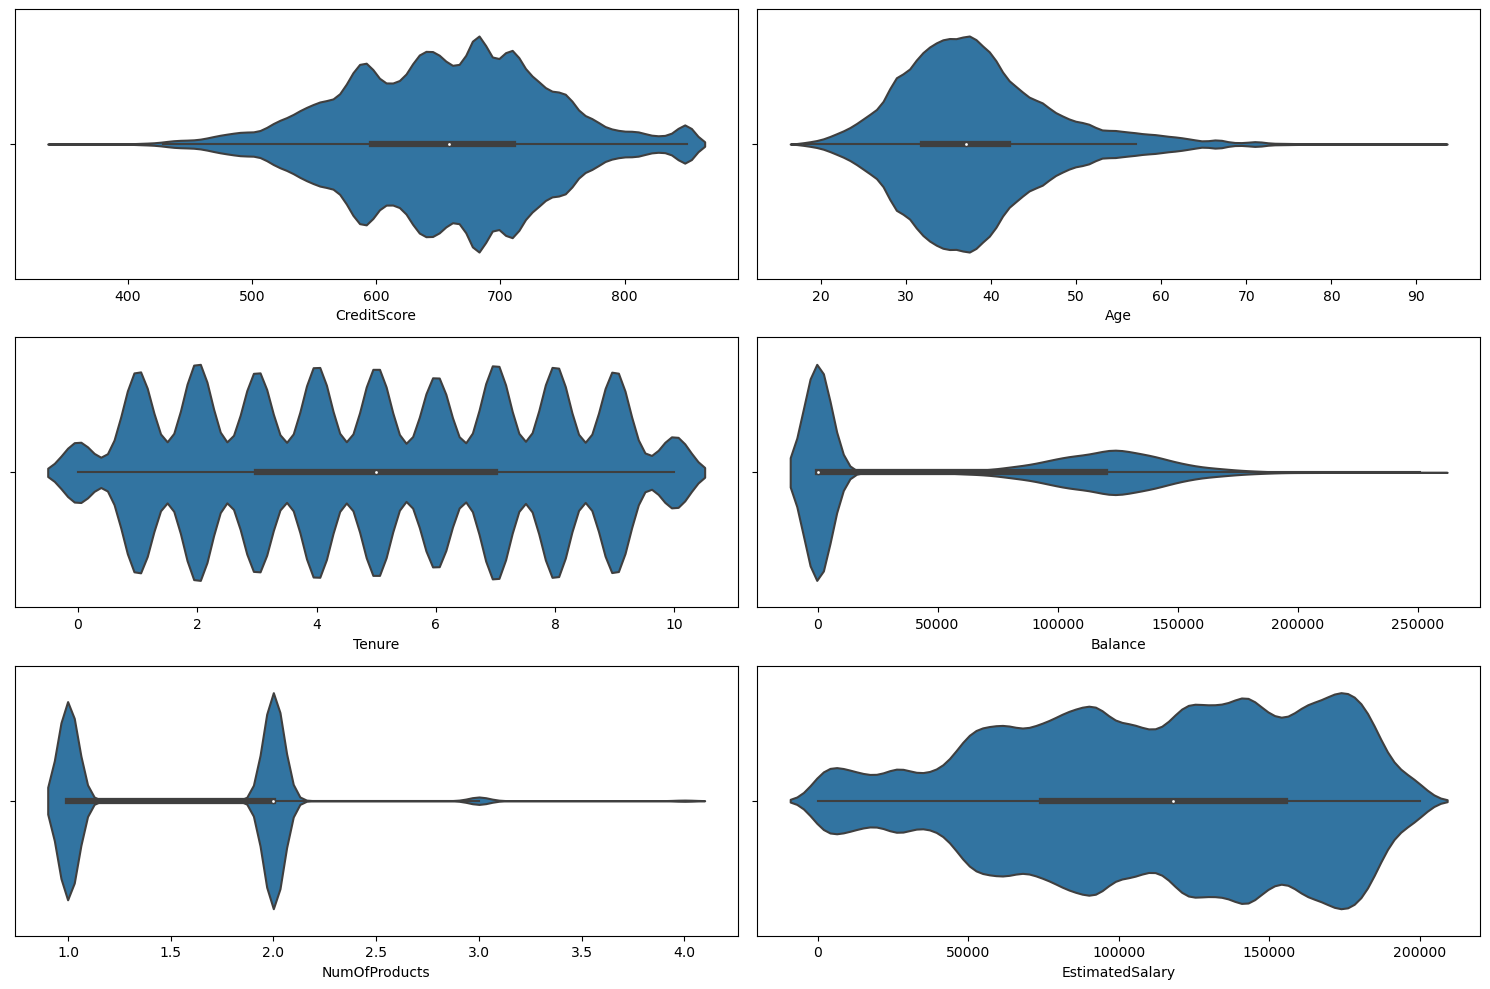

In [17]:
_, axes = plt.subplots(3, 2, figsize=(15, 10))

axes = axes.flatten()
for i, column in enumerate(train.select_dtypes('number').columns[:-1]):
    sns.violinplot(data=train, x=column, hue='Exited', ax=axes[i])

plt.tight_layout()
plt.show()

/Applications/miniconda3/envs/playground/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/miniconda3/envs/playground/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/miniconda3/envs/playground/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/miniconda3/envs/playground/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

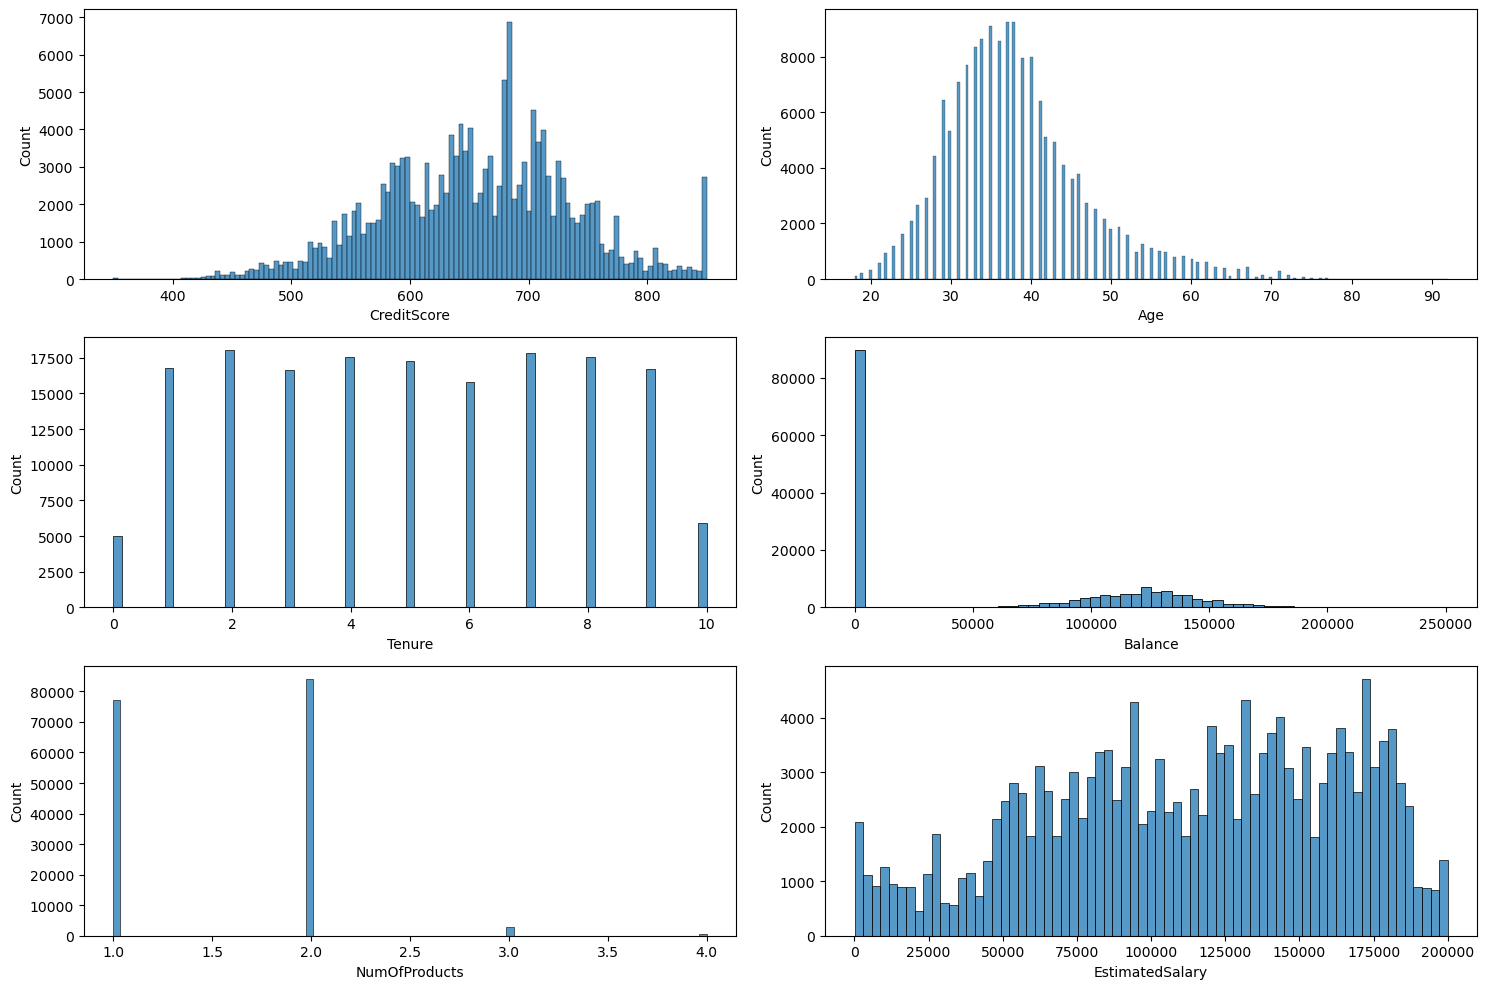

In [18]:
_, axes = plt.subplots(3, 2, figsize=(15, 10))

axes = axes.flatten()
for i, column in enumerate(train.select_dtypes('number').columns[:-1]):
    sns.histplot(data=train, x=column, ax=axes[i])

plt.tight_layout()
plt.show()

<Axes: >

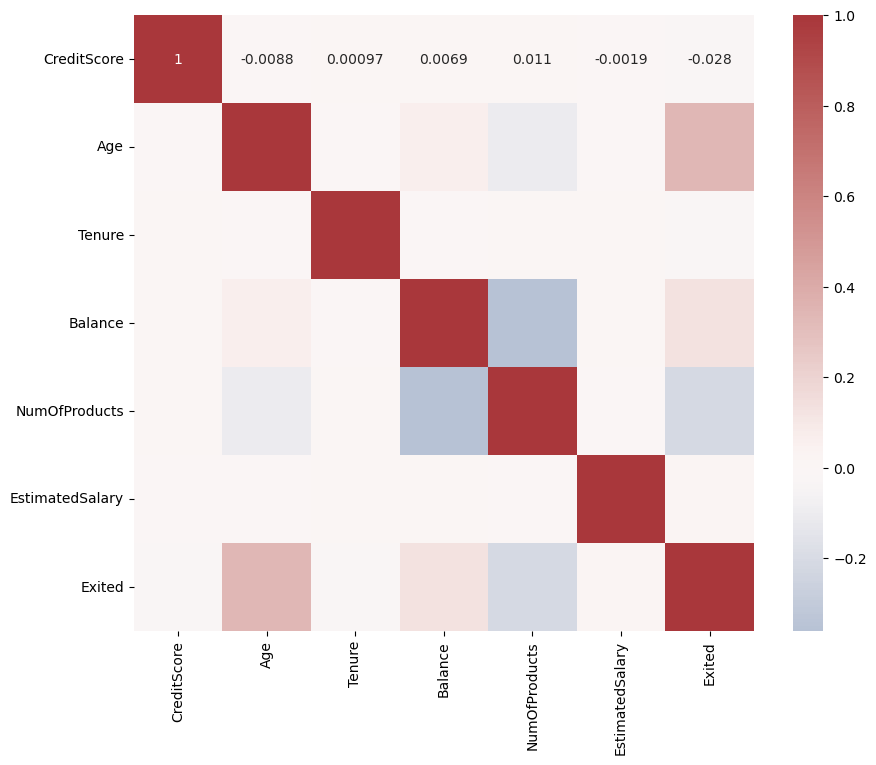

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(train.select_dtypes('number').corr(), center=0, cmap='vlag', annot=True)

In [20]:
(train[train.Exited==0].Balance != 0).value_counts(True)

Balance
False    0.577599
True     0.422401
Name: proportion, dtype: float64

In [21]:
(train[train.Exited==1].Balance != 0).value_counts(True)

Balance
True     0.584921
False    0.415079
Name: proportion, dtype: float64

In [22]:
#sns.pairplot(train, hue='Exited',corner=True)

In [23]:
from preprocessing import Preprocessing

In [24]:
train_scld = Preprocessing().fit_transform(train)

<Axes: >

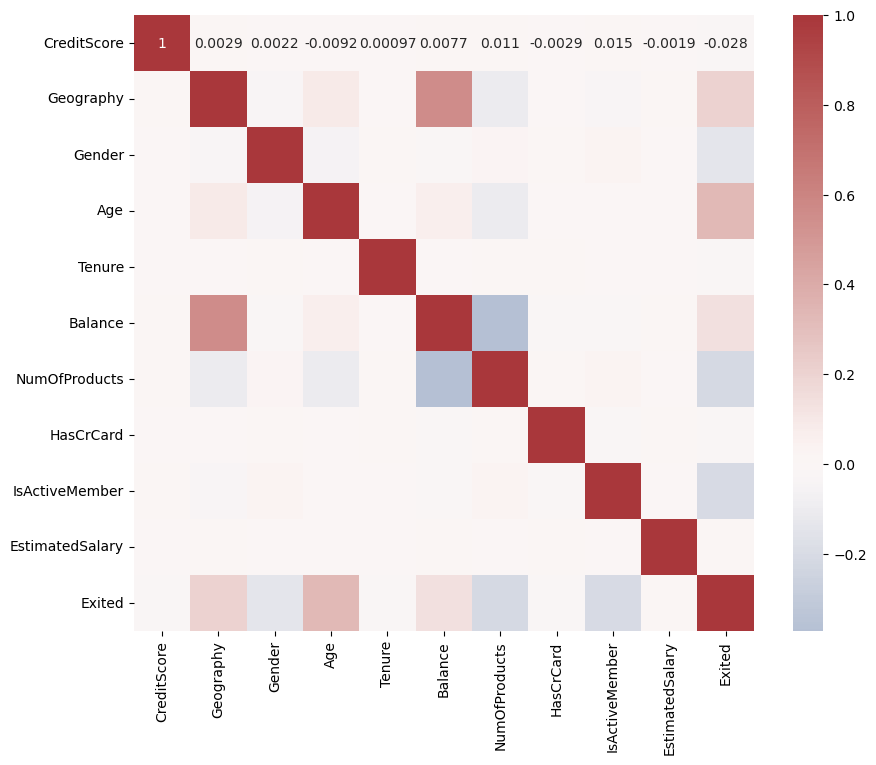

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(train_scld.corr(), center=0, cmap='vlag', annot=True)